# **Coin Flipping**

# Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta

In [2]:
np.random.seed(42)

# Model Specification

Let $y_i$ be the result of flipping a coin which lands on heads with probability $\theta$ and tails with probability $1-\theta$. If it lands on heads we set $y_i = 1$ and if it lands on tails we set $y_i = 0$. We therefore have that each observation $y_i$ follows a **Bernoulli distribution**:  
  $$
  y_i \mid \theta \sim \text{Bernoulli}(\theta), \quad i = 1, \dots, N,
  $$  
  where $\theta$ is the probability of success.  

Given $N$ **i.i.d.** observations $\mathbf{y} = (y_1, \dots, y_N)$, the joint likelihood is:  
$$
p(\mathbf{y} \mid \theta) = \prod_{i=1}^N p(y_i \mid \theta) = \prod_{i=1}^N \theta^{y_i} (1 - \theta)^{1 - y_i}.
$$
  
Let $S = \sum_{i=1}^N y_i$ (total successes). The likelihood becomes:  
$$
p(\mathbf{y} \mid \theta) = \theta^S (1 - \theta)^{N - S}.
$$

# Visualise Simulated Data

In [3]:
# Parameter values
N = 500                 # Number of observations
true_theta = 0.3        # True probability of success

# Generate simulated Bernoulli data
y = np.random.binomial(n=1, p=true_theta, size=N)

# Calculate cumulative success rate
cumulative_success = np.cumsum(y)
cumulative_rate = cumulative_success / (np.arange(N) + 1)

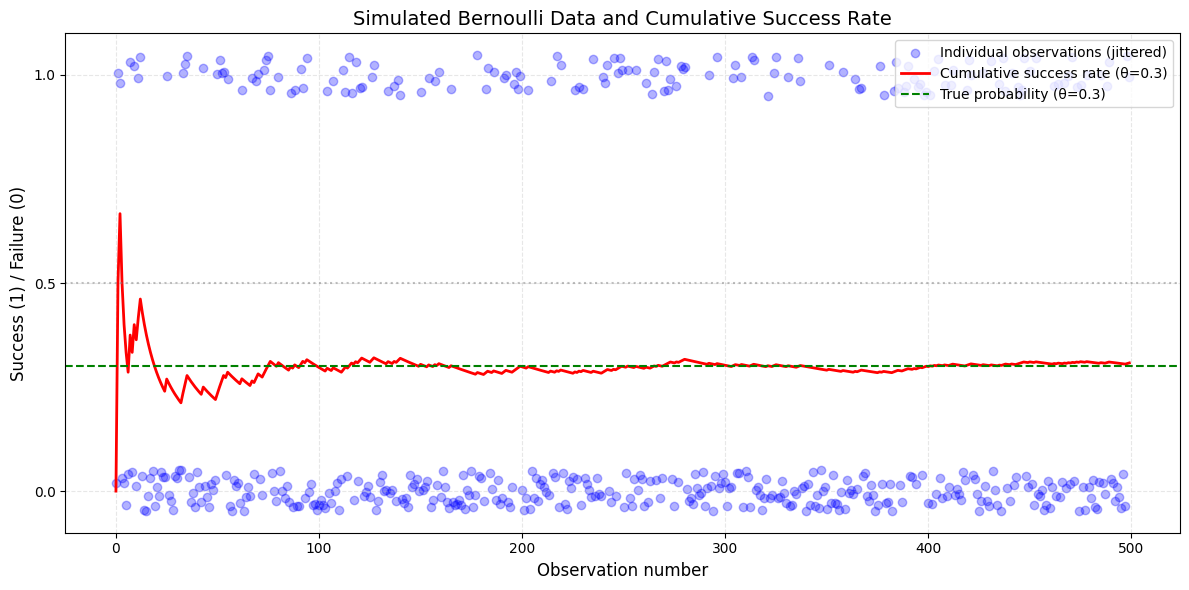

In [4]:
# Create plot
plt.figure(figsize=(12, 6))

# Plot raw binary data (jittered for visibility)
plt.scatter(np.arange(N), y + np.random.uniform(-0.05, 0.05, N), 
            alpha=0.3, label='Individual observations (jittered)', color='blue')

# Plot cumulative success rate
plt.plot(cumulative_rate, 'r-', linewidth=2, 
         label=f'Cumulative success rate (θ={true_theta})')

# Add horizontal lines for reference
plt.axhline(y=true_theta, color='green', linestyle='--', 
            label=f'True probability (θ={true_theta})')
plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)

# Customize plot
plt.title('Simulated Bernoulli Data and Cumulative Success Rate', fontsize=14)
plt.xlabel('Observation number', fontsize=12)
plt.ylabel('Success (1) / Failure (0)', fontsize=12)
plt.ylim(-0.1, 1.1)
plt.yticks([0, 0.5, 1])
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()

plt.show()

# Prior Distribution

We assume a **Beta prior** for $\theta$:  
$$
\theta \sim \text{Beta}(\alpha, \beta),
$$  
with hyperparameters $\alpha, \beta > 0$.  

In [5]:
# Prior parameters (Beta distribution)
alpha_0 = 2    # Prior "successes" + 1
beta_0 = 2     # Prior "failures" + 1

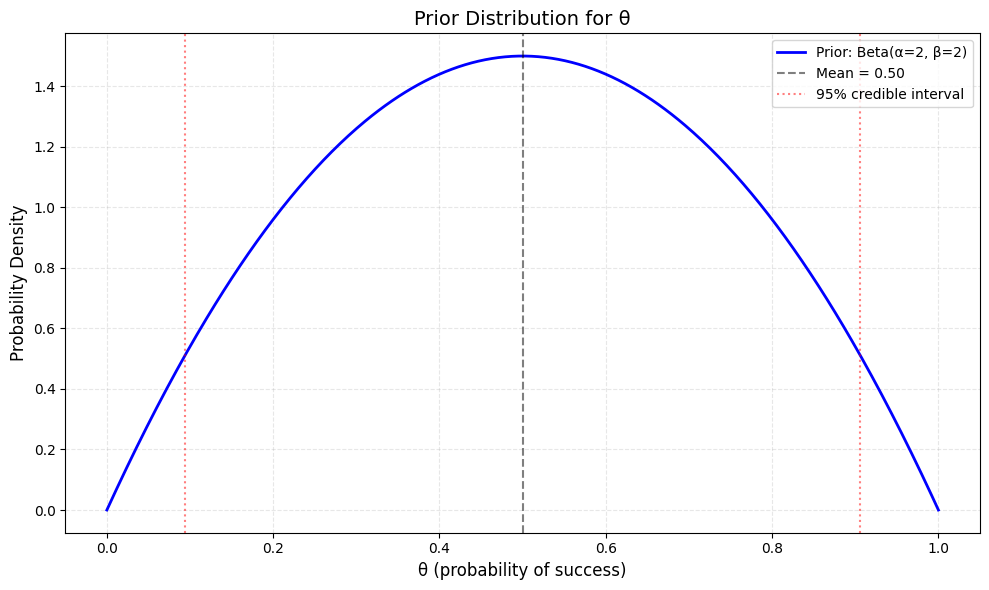

In [6]:
# Create grid of theta values
theta_grid = np.linspace(0, 1, 500)

# Calculate prior density
prior_density = beta.pdf(theta_grid, a=alpha_0, b=beta_0)

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(theta_grid, prior_density, 'b-', linewidth=2, 
         label=f'Prior: Beta(α={alpha_0}, β={beta_0})')

# Highlight mean and 95% credible interval
mean = alpha_0 / (alpha_0 + beta_0)
ci_low, ci_high = beta.ppf([0.025, 0.975], a=alpha_0, b=beta_0)

plt.axvline(mean, color='k', linestyle='--', alpha=0.5, 
            label=f'Mean = {mean:.2f}')
plt.axvline(ci_low, color='r', linestyle=':', alpha=0.5)
plt.axvline(ci_high, color='r', linestyle=':', alpha=0.5,
            label='95% credible interval')

# Customize plot
plt.title('Prior Distribution for θ', fontsize=14)
plt.xlabel('θ (probability of success)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

# Posterior Distribution

The posterior is proportional to:  
$$
p(\theta \mid \mathbf{y}) \propto \theta^S (1 - \theta)^{N - S} \cdot \theta^{\alpha-1} (1 - \theta)^{\beta-1} = \theta^{\alpha + S - 1} (1 - \theta)^{\beta + N - S - 1}.
$$  
This is a **Beta distribution**:  
$$
\theta \mid \mathbf{y} \sim \text{Beta}(\alpha + S, \beta + N - S).
$$

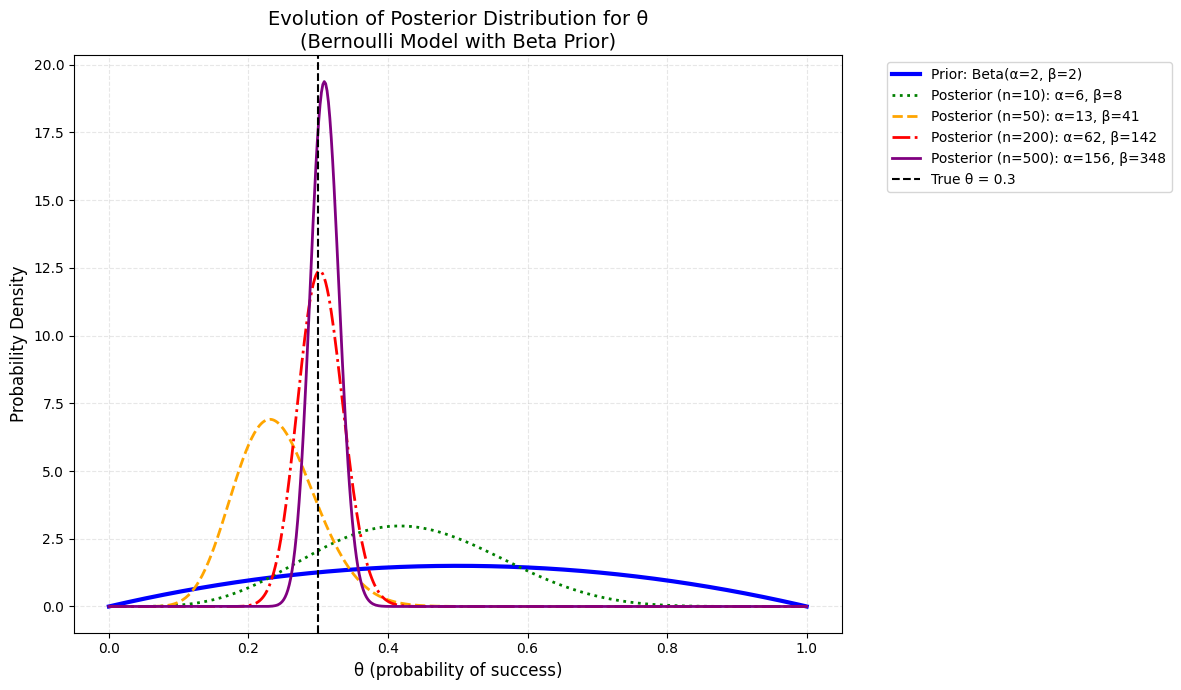

In [7]:
# Define observation subsets
observation_subsets = [10, 50, 200, 500]  # Different sample sizes to plot
colors = ['green', 'orange', 'red', 'purple']
line_styles = [':', '--', '-.', '-']

# Create grid of theta values
theta_grid = np.linspace(0, 1, 500)

# Create plot
plt.figure(figsize=(12, 7))

# Plot prior
prior_density = beta.pdf(theta_grid, alpha_0, beta_0)
plt.plot(theta_grid, prior_density, 'b-', linewidth=3, 
         label=f'Prior: Beta(α={alpha_0}, β={beta_0})')

# Plot posteriors for different observation counts
for n_obs, color, ls in zip(observation_subsets, colors, line_styles):
    # Calculate posterior parameters
    S = np.sum(y[:n_obs])  # Number of successes
    F = n_obs - S          # Number of failures
    
    alpha_post = alpha_0 + S
    beta_post = beta_0 + F
    
    # Calculate posterior density
    posterior_density = beta.pdf(theta_grid, alpha_post, beta_post)
    
    # Plot
    plt.plot(theta_grid, posterior_density, color=color, linestyle=ls, linewidth=2,
             label=f'Posterior (n={n_obs}): α={alpha_post}, β={beta_post}')

# Add true theta line
plt.axvline(true_theta, color='k', linestyle='--', 
            label=f'True θ = {true_theta}')

# Customize plot
plt.title('Evolution of Posterior Distribution for θ\n(Bernoulli Model with Beta Prior)', fontsize=14)
plt.xlabel('θ (probability of success)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

# Sampling From The Posterior

To implement the MH algorithm assume that at iteration $t$, given a sample value at iteration $t-1$, $\beta_{t-1}$ we perform the following:

1. **Generate a candidate value**, $\beta_c$, from the proposal distribution $q(\beta_c|\beta_{t-1})$.  
2. **Calculate the Metropolis-Hastings ratio**, MHR:
   $$
   \text{MHR}(\beta_{t-1}, \beta_c) = \frac{p(\beta_c) \cdot q(\beta_{t-1}|\beta_c)}{p(\beta_{t-1}) \cdot q(\beta_c|\beta_{t-1})}
   $$
   Note that this ratio can be larger than 1.  
3. **Generate** a $\text{Uniform}(0,1)$ random variable $u$.  
4. **Accept/Reject**:
   - If $u \leq \min(1, \text{MHR}(\beta_{t-1}, \beta_c))$, then set $\beta_t = \beta_c$ (i.e. "keep" $\beta_c$).
   - Else, set $\beta_t = \beta_{t-1}$.  
5. Set $t = t + 1$ and go back to Step 1.

In [8]:
# Log-posterior function (up to a constant)
def log_posterior(theta, y, alpha_0, beta_0):
    if theta <= 0 or theta >= 1:  # Reject values outside [0,1]
        return -np.inf
    
    # Log-likelihood (Bernoulli)
    S = np.sum(y)
    log_likelihood = S * np.log(theta) + (len(y) - S) * np.log(1 - theta)
    
    # Log-prior (Beta)
    log_prior = (alpha_0 - 1) * np.log(theta) + (beta_0 - 1) * np.log(1 - theta)
    
    return log_likelihood + log_prior

In [9]:
# Metropolis-Hastings function
def metropolis_hastings(y, alpha_0, beta_0, initial_theta=0.5, 
                       n_samples=10000, step_size=0.05):
    
    theta_samples = np.zeros(n_samples)
    theta_current = initial_theta
    accepted_count = 0
    
    for i in range(n_samples):
        # Sample from proposal distribution (truncated normal)
        theta_proposed = np.random.normal(theta_current, step_size)
        
        # Compute log acceptance ratio
        log_alpha = (log_posterior(theta_proposed, y, alpha_0, beta_0) - 
                     log_posterior(theta_current, y, alpha_0, beta_0))
        
        # Accept/reject
        if np.log(np.random.rand()) < log_alpha and 0 < theta_proposed < 1:
            theta_current = theta_proposed
            accepted_count += 1
        
        theta_samples[i] = theta_current
    
    acceptance_rate = accepted_count / n_samples
    print(f"Acceptance rate: {acceptance_rate:.2f}")
    return theta_samples

In [10]:
# Run MCMC
theta_samples = metropolis_hastings(y=y, alpha_0=alpha_0, beta_0=beta_0, 
                                  initial_theta=0.5, n_samples=15000, 
                                  step_size=0.08)

Acceptance rate: 0.31


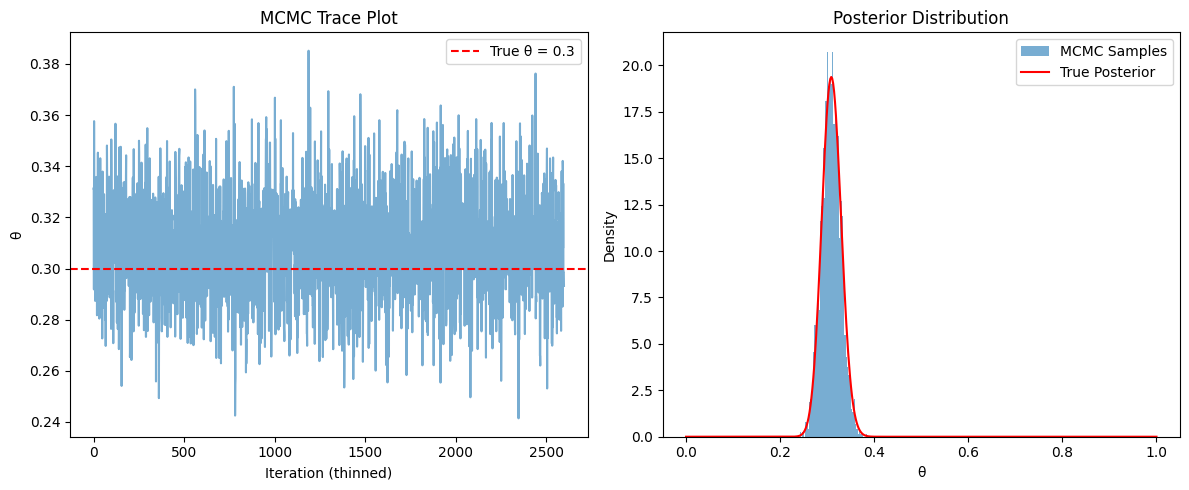

Posterior mean: 0.308
Posterior 95% credible interval: [0.27002716 0.34923126]


In [11]:
# Burn-in and thinning
burn_in = 2000
thinned_samples = theta_samples[burn_in::5]

# Plot results
plt.figure(figsize=(12, 5))

# Trace plot
plt.subplot(1, 2, 1)
plt.plot(thinned_samples, alpha=0.6)
plt.xlabel("Iteration (thinned)")
plt.ylabel("θ")
plt.title("MCMC Trace Plot")
plt.axhline(true_theta, color='r', linestyle='--', label=f'True θ = {true_theta}')
plt.legend()

# Posterior histogram
plt.subplot(1, 2, 2)
plt.hist(thinned_samples, bins=50, density=True, alpha=0.6, 
         label='MCMC Samples')

# Analytical posterior for comparison
S = np.sum(y)
alpha_post = alpha_0 + S
beta_post = beta_0 + len(y) - S
x_grid = np.linspace(0, 1, 500)
plt.plot(x_grid, beta.pdf(x_grid, alpha_post, beta_post), 
         'r-', label='True Posterior')
plt.xlabel("θ")
plt.ylabel("Density")
plt.title("Posterior Distribution")
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Posterior mean: {np.mean(thinned_samples):.3f}")
print(f"Posterior 95% credible interval: {np.percentile(thinned_samples, [2.5, 97.5])}")